# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
df_airbnb = pd.read_csv('./airbnb_hw.csv', low_memory=False)
print("df_airbnb.shape:")
print(df_airbnb.shape, '\n')

print("df_airbnb.dtypes:")
print(df_airbnb.dtypes, '\n')

df_airbnb.head()

#ANSWERING TEXT QUESTIONS

df_airbnb.shape:
(30478, 13) 

df_airbnb.dtypes:
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
pd.crosstab(df_airbnb['Room Type'], df_airbnb['Property Type'])

#ANSWERING TEXT QUESTIONS

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


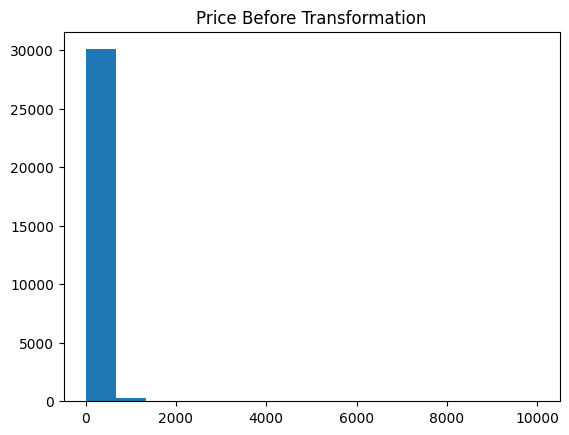

In [4]:
var = 'Price'
df_airbnb[var] = df_airbnb[var].str.replace(',', '')
df_airbnb[var] = pd.to_numeric(df_airbnb[var], errors='coerce')
df_airbnb[var].hist(bins = 15, grid = False)
plt.title('Price Before Transformation')
plt.show()

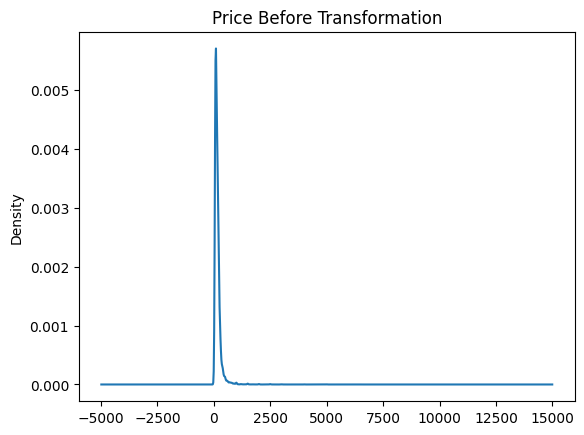

In [5]:
df_airbnb[var].plot.kde()
plt.title('Price Before Transformation')
plt.show()

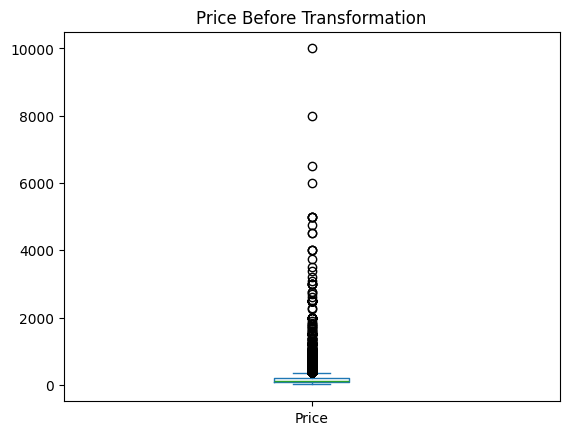

In [6]:
df_airbnb[var].plot.box()
plt.title('Price Before Transformation')
plt.show()

In [7]:
print('Price Description Before Transformation: \n')
df_airbnb[var].describe()

Price Description Before Transformation: 



,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


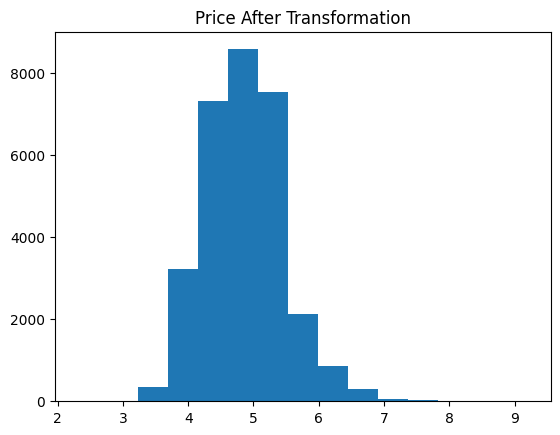

In [8]:
df_airbnb['price_log'] = np.log(df_airbnb['Price'])
df_airbnb['price_log'].hist(bins = 15, grid = False)
plt.title('Price After Transformation')
plt.show()

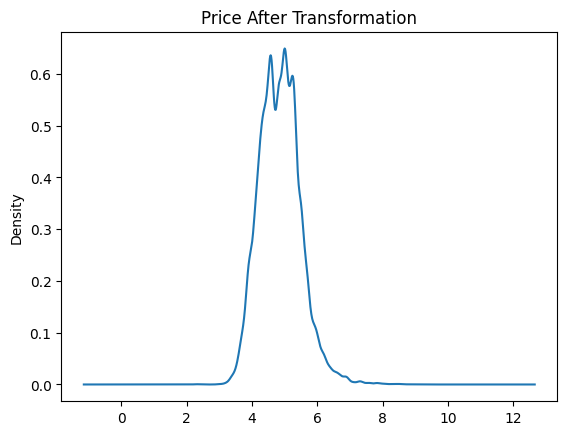

In [9]:
df_airbnb['price_log'].plot.kde()
plt.title('Price After Transformation')
plt.show()

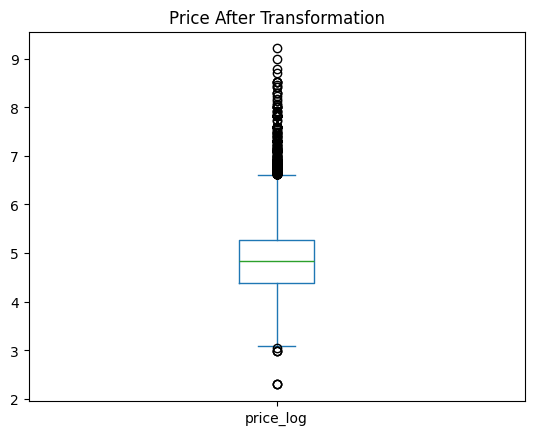

In [10]:
df_airbnb['price_log'].plot.box()
plt.title('Price After Transformation')
plt.show()

In [11]:
print('Price Description After Transformation: \n')
df_airbnb['price_log'].describe()

Price Description After Transformation: 



,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


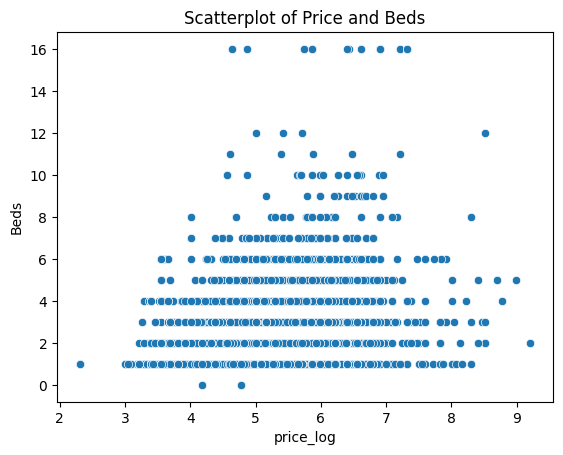

In [12]:
import seaborn as sns
sns.scatterplot(data = df_airbnb, x = 'price_log', y = 'Beds')
plt.title('Scatterplot of Price and Beds')
plt.show()

In [13]:
df_airbnb.groupby('Beds')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


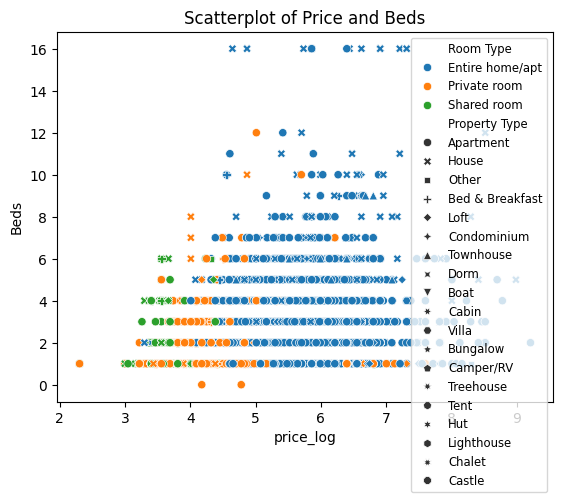

price_log                                \
                                    count      mean       std       min   
Room Type       Property Type                                             
Entire home/apt Apartment         15669.0  5.206168  0.489434  2.302585   
                Bed & Breakfast      13.0  5.077144  0.516313  4.442651   
                Boat                  7.0  5.022801  0.312121  4.605170   
                Bungalow              4.0  4.972587  0.355222  4.465908   
                Cabin                 1.0  5.521461       NaN  5.521461   
                Camper/RV             6.0  4.458062  0.767476  3.806662   
                Condominium          72.0  5.509198  0.599058  4.382027   
                Dorm                  4.0  3.698835  0.466067  3.401197   
                House               752.0  5.344804  0.726103  3.295837   
                Lighthouse            1.0  3.663562       NaN  3.663562   
                Loft                392.0  5.541689  0.660188  4.007333   
                Other                14.0  5.966137  1.305421  4.189655   
                Townhouse            83.0  5.361044  0.662464  4.189655   
                Villa                 4.0  5.774868  1.091494  4.787492   
Private room    Apartment         10748.0  4.432350  0.407063  2.302585   
                Bed & Breakfast     155.0  4.476887  0.437511  3.465736   
                Boat                  1.0  4.787492       NaN  4.787492   
                Cabin                 1.0  4.382027       NaN  4.382027   
                Camper/RV             1.0  3.663562       NaN  3.663562   
                Castle                1.0  5.010635       NaN  5.010635   
                Chalet                1.0  4.595120       NaN  4.595120   
                Condominium          22.0  4.511922  0.406843  3.828641   
                Dorm                 16.0  4.381505  0.386500  3.912023   
                House              1258.0  4.256318  0.403029  3.218876   
                Hut                   2.0  4.258597  0.490129  3.912023   
                Loft                312.0  4.506889  0.479456  3.663562   
                Other                29.0  4.983519  0.814155  3.663562   
                Tent                  4.0  4.598841  0.822393  3.688879   
                Townhouse            52.0  4.360348  0.355681  3.806662   
                Treehouse             1.0  4.553877       NaN  4.553877   
                Villa                 4.0  4.702199  0.616979  4.094345   
Shared room     Apartment           685.0  4.213043  0.511365  2.995732   
                Bed & Breakfast      12.0  4.346141  0.958659  3.401197   
                Dorm                 11.0  4.164405  0.496675  3.401197   
                House                80.0  3.816271  0.589856  2.302585   
                Loft                 49.0  4.115564  0.591498  3.401197   
                Other                 4.0  4.757272  0.749856  4.248495   
                Townhouse             1.0  4.553877       NaN  4.553877   
                Treehouse             3.0  4.979930  0.630146  4.553877   

                                                                         
                                      25%       50%       75%       max  
Room Type       Property Type                                            
Entire home/apt Apartment        4.905275  5.164786  5.459586  9.210340  
                Bed & Breakfast  4.795791  4.867534  5.393628  6.263398  
                Boat             4.807903  5.010635  5.203266  5.521461  
                Bungalow         4.869437  5.075720  5.178871  5.273000  
                Cabin            5.521461  5.521461  5.521461  5.521461  
                Camper/RV        3.891820  4.243470  4.733123  5.783825  
                Condominium      5.043425  5.298317  5.926926  7.595890  
                Dorm             3.401197  3.506058  3.803695  4.382027  
                House            4.840219  5.273000  5.703782  8.98

In [17]:
sns.scatterplot(data = df_airbnb, x = 'price_log', y = 'Beds', hue = 'Room Type', style = 'Property Type')
plt.title('Scatterplot of Price and Beds')
plt.show()

df_airbnb.loc[:, ['Room Type', 'Property Type', 'price_log']].groupby(['Room Type', 'Property Type']).describe()

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [19]:
df_rigs = pd.read_csv('./drilling_rigs.csv', low_memory=False)
print("df_rigs.shape:")
print(df_rigs.shape, '\n')

print("df_rigs.dtypes:")
print(df_rigs.dtypes, '\n')

df_rigs.head()

df_rigs.shape:
(623, 10) 

df_rigs.dtypes:
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number o

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [20]:
df_rigs['time'] = pd.to_datetime(df_rigs['Month'], format='mixed')

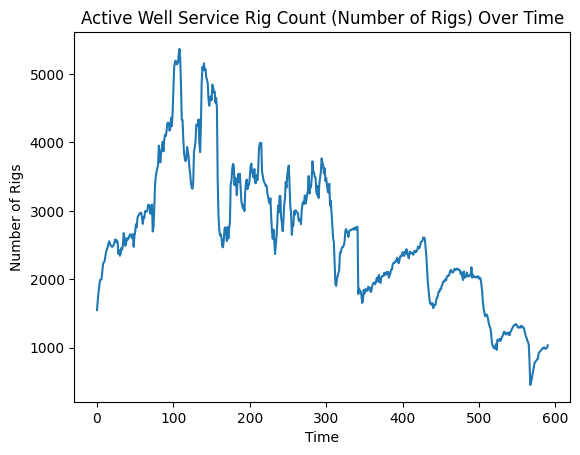

In [25]:
var = 'Active Well Service Rig Count (Number of Rigs)'
df_rigs[var] = pd.to_numeric(df_rigs[var], errors='coerce')
df_rigs[var].plot(xlabel='Time', ylabel='Number of Rigs')
plt.title('Active Well Service Rig Count (Number of Rigs) Over Time')
plt.show()